## Градиентный Спуск руками

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

Создадим базовый класс BaseLoss, который будем использовать для реализации функционалов ошибки. У него два абстрактных метода:

1. Метод calc_loss, который будет принимать на вход объекты x, правильные ответы y и веса w и вычислять значения лосса.

2. Метод calc_grad, который будет принимать на вход объекты x, правильные ответы y и веса w и вычислять значения градиента (вектор).

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Реализуем Mean Squared Error Loss.

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        y_pred = X.dot(w)
        mse = np.square(np.linalg.norm(y - y_pred)) / X.shape[0]
        return mse

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (2 / X.shape[0]) * X.transpose().dot(X.dot(w) - y)

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь напишем градиентный спуск.

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations + 1 объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    iterations = np.zeros((n_iterations + 1, w_init.shape[0]))
    iterations[0] = w_init
    for step in range(n_iterations):
        gradient = loss.calc_grad(X, y, w_init)
        w_init = w_init - lr * gradient
        iterations[step + 1] = w_init
    return iterations

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045026
0.8670644395649494


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

Отрисуем траекторию градиентного спуска для разных значений длины шага.

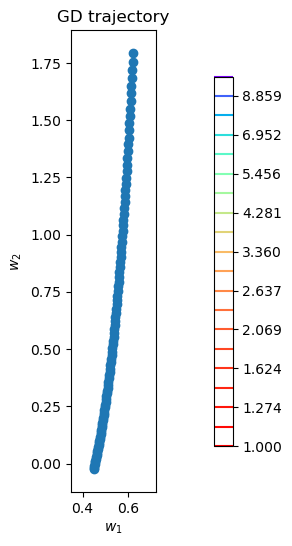

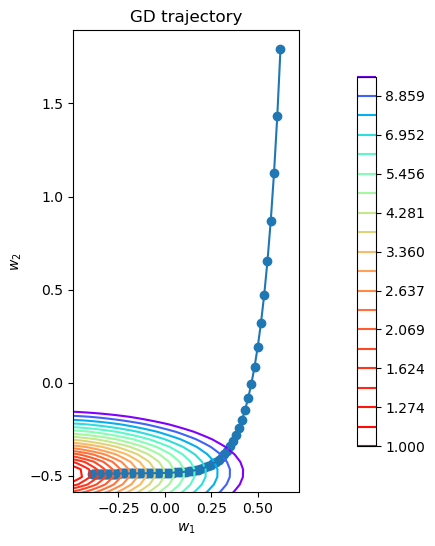

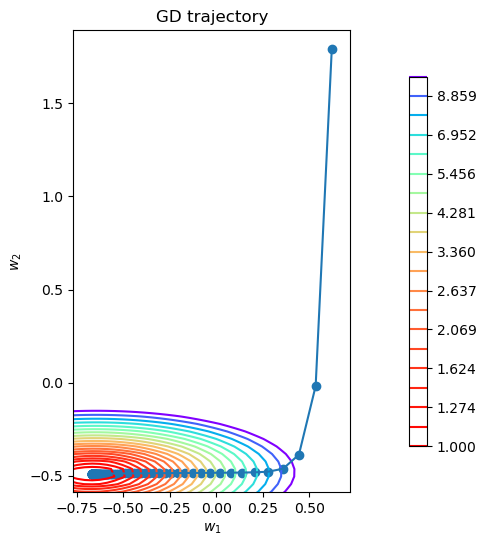

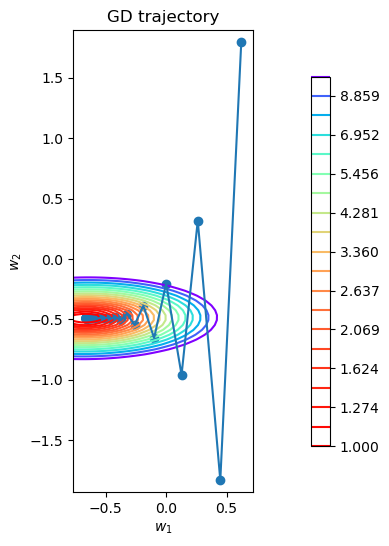

In [9]:
learning_rates = [0.0001, 0.001, 0.005, 0.01]
for rate in learning_rates:
    history = gradient_descent(w_init, X, y, loss, rate, 100)
    plot_gd(history, X, y, loss)

Параметр длины шага - это некий коэффициент с которым градиент t-1 вектора весов вычитается из этого вектора. Соответственно, чем больше этот параметр, тем больше шаги, с которыми веса приближаются к минимуму функционала ошибки. На первом графике мы видим, что при слишком маленькой длине шага 0.0001 градиентный спуск просто не пришёл к точке минимума за наше фиксированное число итераций 100000. Но даже в градиентном спуске с нефиксированным числом итераций градиентный спуск такими маленькими шагами требует очень большой вычислительной мощности, ведь пока мы не дойдём до минимума придётся очень много раз считать производные по каждому из параметров.

С другой стороны, если мы посмотрим на последний график для параметра 0.01, мы увидим, что веса очень сильно "скачут", при такой траектории весов всегда есть риск, что градиентный спуск просто перескочит минимум функционала ошибки (в нашем случае, он сошёлся в точке минимума).

В условиях trade-off между временем выполенения спуска и риском перескочить минимум стоит выбрать параметр 0.005. Он делал не слишком маленькие шаги и более быстро прошёл "далёкие" линии уровня, но при этом сошёлся в точке минимума.

Теперь реализуем стохастический градиентный спуск.

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    iterations = np.zeros((n_iterations + 1, w_init.shape[0]))
    iterations[0] = w_init
    for step in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        ybatch = y[batch_indices]
        gradient = loss.calc_grad(batch, ybatch, w_init)
        w_init = w_init - lr * gradient
        iterations[step + 1] = w_init
    return iterations    

Нарисуем траекторию ГС для разных значений длины шага и размера батча.

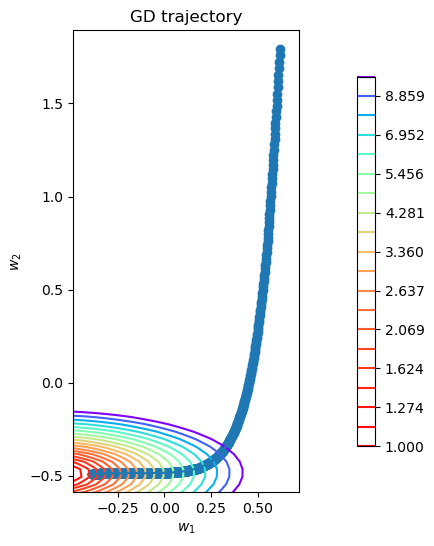

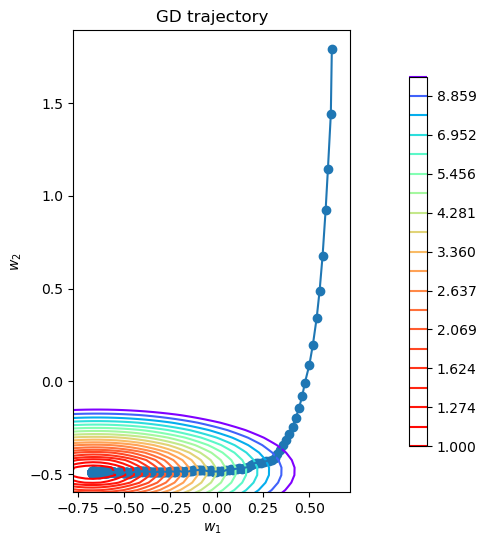

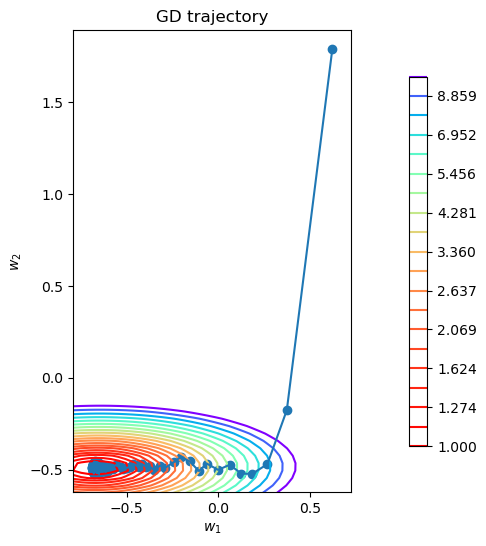

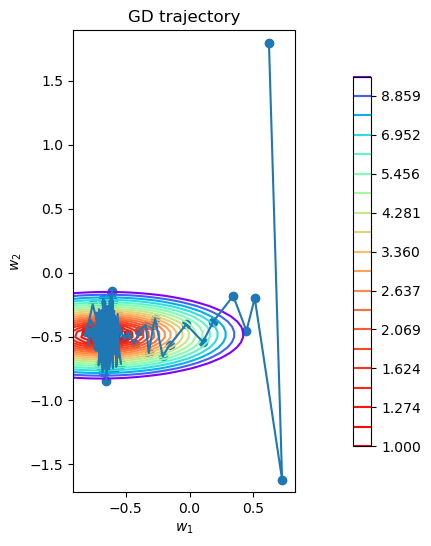

In [11]:
learning_rates = [0.0001, 0.001, 0.005, 0.01]
listbatch = [200, 100, 50, 10]
for rate, batch_size in zip(learning_rates, listbatch):
    history = stochastic_gradient_descent(w_init, X, y, loss, rate, batch_size)
    plot_gd(history, X, y, loss)

Я попробовала скомбинировать параметры так, чтобы на первых графиках градиентный спуск получался самым вычислительно сложным, а на последних - самым рискованным, то есть комбинации от маленький шаг + большой батч до большой шаг + маленький батч. Градиентный спуск отличается от стохастического тем, что в стохастическом градиентном спуске градиент считается не по всей выборке, а по случайно выбранной подвыборке, что снижает время выполнения спуска, но при этом и снижает точность. По графикам из этого и предыдущего заданий мы видим, что стохастический градиентный спуск при тех же размерах шага скачет сильнее. Чем меньше подвыборка, по которой будет считаться градиент, тем больше рисков (например, может попасться подвыборка с необычными объектами). На первом графике мы видим, что градиентный спуск за 1000 итераций не успел дойти до минимума, потому что маленький шаг и большой батч сделали спуск очень сложным вычислительно. На последнем же графике не очень понятно, куда он пришел и, вероятно, проскочил минимум. Попробуем компенсировать маленький батч маленьким шагом:

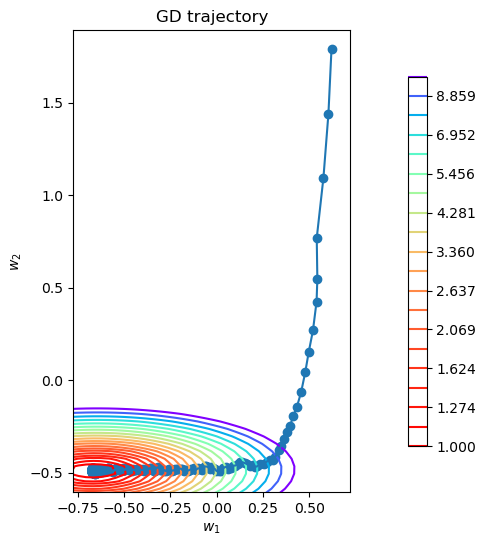

In [12]:
history = stochastic_gradient_descent(w_init, X, y, loss, 0.001, 30)
plot_gd(history, X, y, loss)

Мы взяли всего 10% выборки для подсчёта градиента, но сделали шаг чуть меньше. Это позволило улучшить результаты. При этом отметим, что из-за маленького шага спуск не сильно "скокал". Попробуем в другую сторону:

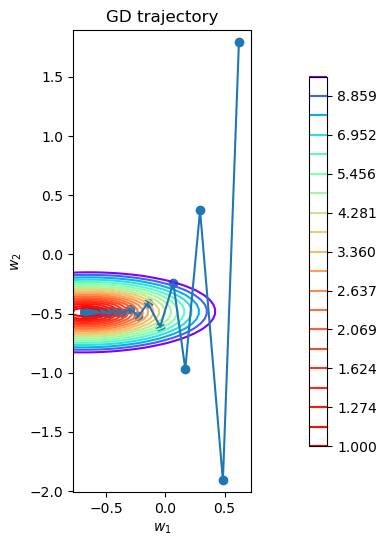

In [14]:
history = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 200)
plot_gd(history, X, y, loss)

В этом случае тоже градиентный спуск был реализован более точно. Из-за большого шага он сильно скачет, особенно на далеких линиях уровня. Можно сделать вывод, что параметры длины шага и размера батча компенсируют друг друга, но стоит избегать опасных комбинаций маленький шаг + большой батч и большой шаг + маленький батч - в первом случае может не дойти, а во втором - перескочить.

Реализуем стохастический градиентный спуск с затухающим шагом.

In [15]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations + 1 объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    iteration = np.zeros((n_iterations + 1, w_init.shape[0]))
    iteration[0] = w_init
    t = 0
    for step in range(n_iterations):
        t += 1
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        ybatch = y[batch_indices]
        gradient = loss.calc_grad(batch, ybatch, w_init)
        lrlen = lr * ((1 / (1 + t))**p)
        w_init = w_init - lrlen * gradient
        iteration[step + 1] = w_init
    return iteration

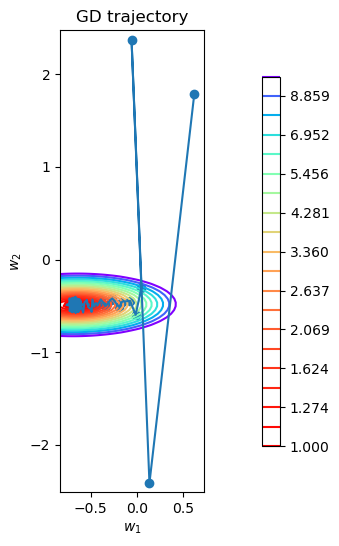

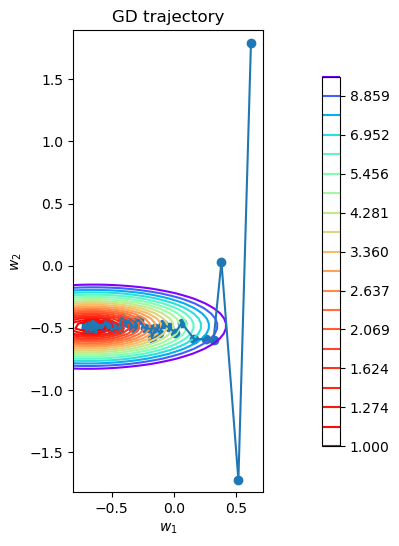

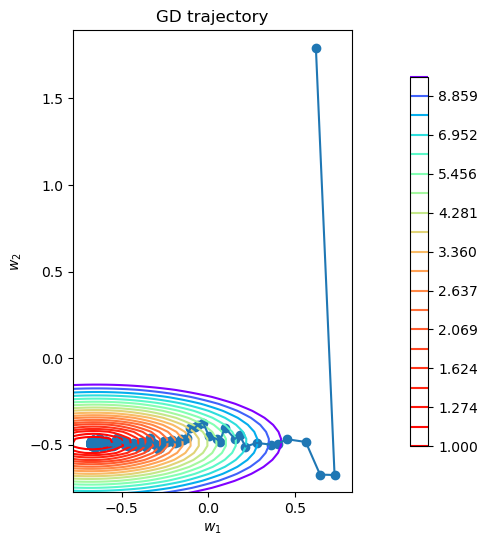

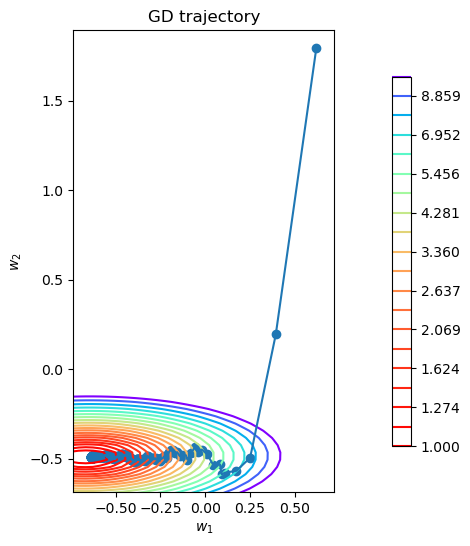

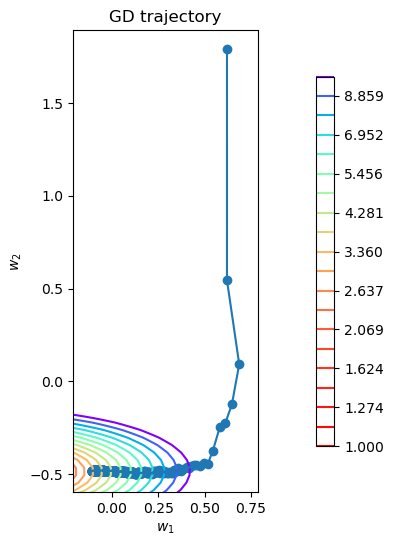

In [16]:
plist = [0.1, 0.3, 0.5, 0.7, 1]
for p in plist:
    history = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p)
    plot_gd(history, X, y, loss)

У тех версий спуска, у котороых больше параметр p, будет меньше длина шага на той же итерации, поскольку мы рассматриваем р в интервале от 0.1 до 1 и для шага берём обратное число. Например, на 10 итерации при lr 0.01 для p=0.1 шаг будет равен 0.008, а для р равного 1 - 0.0009. Таким образом в среднем спуск с большим p будет двигаться медленнее. Мы видим это на последнем графике - градиентный спуск не смог дойти до точки минимума функционала. При этом при меньшем p спуск будет более хаотичен. Средний параметр p, напрмер, 0.5 позволяет балансировать между быстрым прохождением далёких линий уровня и низким риском перескочить минимум.

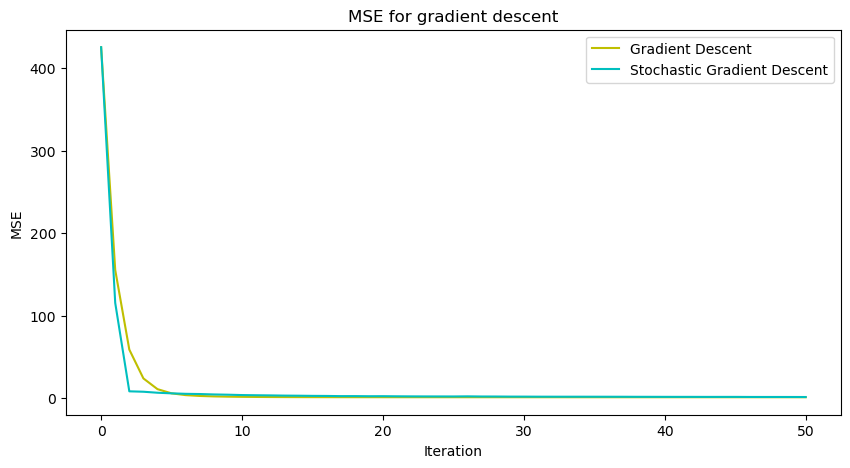

In [17]:
GD = np.zeros(51)
SGD = np.zeros(51)

weights_gd = gradient_descent(w_init, X, y, loss, 0.01, 50)
weights_sgd = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.5, 50)

for i in np.arange(len(weights_gd)):
    GD[i] = loss.calc_loss(X, y, weights_gd[i])

for j in  np.arange(len(weights_sgd)):
    SGD[j] = loss.calc_loss(X, y, weights_sgd[j])


plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(GD)), GD, label='Gradient Descent', color ='y')
plt.plot(np.arange(len(SGD)), SGD, label='Stochastic Gradient Descent', color ='c')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE for gradient descent')
plt.legend()

Видно, что синий график SGD позволяет быстрее уменьшить MSE на первых шагах, однако на дальнейших итерациях ошибки на GD и SGD практически выравниваются, преимущество SGD с плавающим шагом - быстрое прохождение далёких линий уровня (на первых итерациях веса будут быстрее приближаться к минмуму ошибки) видно на графике. Выравниваются же графики за счёт хорошего параметра p, который даже при небольшом размере батча позволил сильно уменьшить шаги на последних итерациях, что увеличило вероятность сходимости спуска.

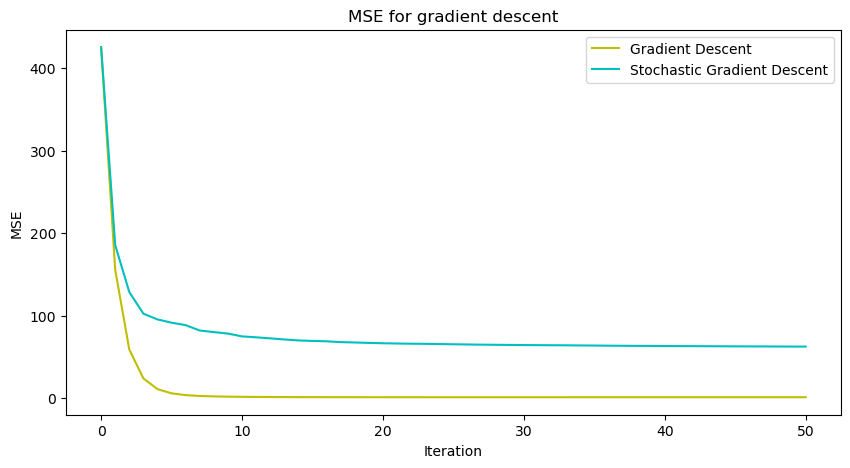

In [18]:
GD = np.zeros(51)
SGD = np.zeros(51)

weights_gd = gradient_descent(w_init, X, y, loss, 0.01, 50)
weights_sgd = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 2, 50)

for i in np.arange(len(weights_gd)):
    GD[i] = loss.calc_loss(X, y, weights_gd[i])

for j in  np.arange(len(weights_sgd)):
    SGD[j] = loss.calc_loss(X, y, weights_sgd[j])


plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(GD)), GD, label='Gradient Descent', color ='y')
plt.plot(np.arange(len(SGD)), SGD, label='Stochastic Gradient Descent', color ='c')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE for gradient descent')
plt.legend()

Мы сильно увеличили параметр p, что дало большую, чем у обычного GD ошибку на первых 50 итерациях. При этом по графику с таким большим параметром р (чтобы явно продемонстрировать я специально вышла за пределы "хороших" значений р) вообще не видно преимущество градиентного спуска, потому что шаг на первых итерациях стал слишком маленьким и различия в ошибках практически не видно.

## Линейная Регрессия руками

In [23]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        #Инициализируем случайный вектор весов - с него начётся градиентный спуск. Извлекаем из нормального распределения 
        #вектор со значениями от -3 до 3 размерности, совпадающей с количеством признаков в матрице X.
        self.w_init = np.random.uniform(-3, 3, X.shape[1])
        
        #Применяем градиентный спуск к нашему случайному вектору весов. gradient_descent вернёт историю весов
        #в градиентном спуске, его последний элемент - финальный вектор весов.
        w = gradient_descent(self.w_init, X, y, self.loss, 0.005)
        self.w = w[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        #Функция вернёт вектор предсказанных значений y, которые мы получим умножив матрицу X на вектор оптимальных весов.
        return X.dot(self.w)

In [24]:
linear_regression = LinearRegression(MSELoss())

Реализуем класс MSEL2Loss - он будет регуляризовать модель по L2 норме.

In [34]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        y_pred = X.dot(w)
        MSEL = (np.square(np.linalg.norm(y - y_pred)) / X.shape[0]) +  self.coef * np.square(np.linalg.norm(w[:-1]))
        return MSEL
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        self.w_no_intercept = w
        self.w_no_intercept[-1] = 0
        return (2 / X.shape[0]) * (X.transpose().dot(X.dot(w) - y)) + 2 * self.coef * self.w_no_intercept
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Реализуем класс HuberLoss для функции потерь Хубера, сочетающей MSE и MAE.

In [35]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        self.z = X.dot(w) - y
        self.z_in_eps = 1/2 * (self.z ** 2)
        self.z_not_in_eps = self.eps * (np.abs(self.z) - (1/2 * self.eps))
        
        in_eps = np.abs(self.z) < self.eps
        
        self.loss = np.zeros(y.shape[0])
        
        self.loss[in_eps] = self.z_in_eps[in_eps]
        self.loss[~in_eps] = self.z_not_in_ep[~in_eps]
        
        return self.loss / X.shape[1]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        
        self.z = X.dot(w) - y
        self.z_in_eps = self.z
        self.z_not_in_eps = self.eps * np.sign(self.z)
        
        in_eps = np.abs(self.z) < self.eps
        
        self.gloss = np.zeros(y.shape[0])
        
        self.gloss[in_eps] = self.z_in_eps[in_eps]
        self.gloss[~in_eps] = self.z_not_in_eps[~in_eps]
        
        
        return X.transpose().dot(self.gloss) / X.shape[0]

## Алгоритм Имитации Отжига

In [40]:
from math import exp

In [37]:
def annealing(X: np.ndarray, y: np.ndarray, loss: BaseLoss, lr = 0.01, n_iterations = 1000) -> List[np.ndarray]:
    """
    Функция имитации отжига
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать среднеквадратичную ошибку при помощи loss.calc_loss(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать новую точку семплированную из распределения Стьюдента
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations + 1 объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    #инициализируем случайный вектор весов из нормального распределения
    w_init = np.random.uniform(-3, 3, X.shape[1])
    #создадим массив из нулей для хранения истории весов
    iterations = np.zeros((n_iterations + 1, X.shape[1]))
    #добавим в историю первый случайный вес
    iterations[0] = w_init
    for step in range(n_iterations):
        #семплируем новую точку из распределения Стьюдента и домножим на шаг. Возьмем пять степеней свободы,
        #диспресия у этого распределения не очень большая и новые точки w_new будут близки к старым w_init.
        w_new = w_init + lr * np.random.standard_t(5, size=w_init.shape)
        #проверяем, "понижается ли энергия"
        if loss.calc_loss(X, y, w_new) - loss.calc_loss(X, y, w_init) < 0:
            #если понижается, то переходим к новой точке
            w_init = w_new
        else:
        #если не понижается, то оценим вероятность перехода к новым весам. зададим закон убывания как экспонециальную
        #функцию e^(-i). прибавим к заменателю очень маленькое число exp(-20), чтобы избежать ошибки деления на ноль
            p = exp(-(loss.calc_loss(X, y, w_new) - loss.calc_loss(X, y, w_init)) / (exp(-step) + exp(-20)))
            #используем эту вероятность как вероятность успеха в биномиальном распределении
            if np.random.binomial(1, p) == 1:
                #при высокой вероятности переходим к новой точке
                w_init = w_new
        iterations[step + 1] = w_init
    return iterations

Создадим случайный датасет:

In [38]:
np.random.seed(133)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

В переменную history сохраним историю весов, полученную с помощью алгоритма имитации отжига и построим график:

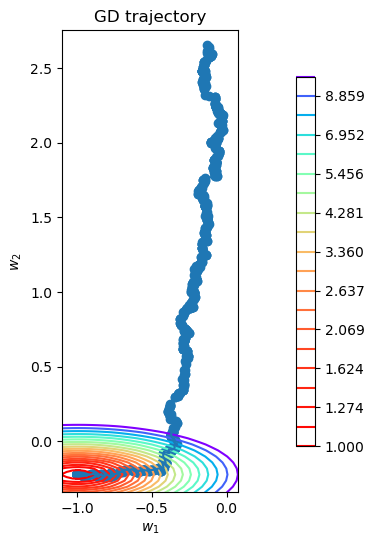

In [41]:
history = annealing(X, y, loss= MSELoss())
plot_gd(history, X, y, loss= MSELoss())

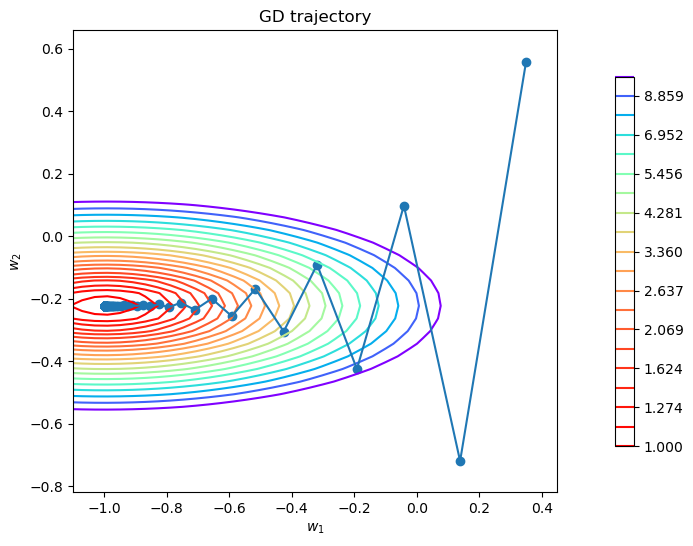

In [42]:
history = gradient_descent(w_init, X, y, loss= MSELoss(), lr = 0.01)
plot_gd(history, X, y, loss= MSELoss())

In [43]:
class LinearRegressionAnnealing:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegressionAnnealing":
        X = np.asarray(X)
        y = np.asarray(y)
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w = annealing(X, y, loss= MSELoss())
        self.w = w[-1]
        return self      
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.w)